# libraries and import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Functions

In [4]:
#function to calculate the summary
def group_plot(df,var1,var2):
    df1=df.groupby(var1)[var2].count()
    df1=df1.reset_index()
    df1.rename(columns={var2:'Total Count'}, inplace=True)
    df1.sort_values(by=['Total Count'], ascending=False, inplace=True)
    df1.reset_index(drop=True, inplace=True)
    return df1

# Creation of initial data frame (Parameters)

In [5]:
df=pd.read_csv(r"C:\Users\crist\OneDrive\Desktop\Proyectos\Salary prediction\data_cleaned_2021.csv")

In [6]:
df.drop('index', axis=1,inplace=True)

In [7]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,...,0,0,1,1,0,0,0,data scientist,na,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,...,0,0,0,0,0,0,0,data scientist,na,M
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,data scientist,na,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,...,0,0,0,0,0,0,0,other scientist,sr,M
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,...,0,1,0,0,0,0,0,data engineer,sr,na
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,...,0,0,0,0,0,0,0,other scientist,na,P
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,...,0,0,0,0,0,0,0,data scientist,na,na


In [8]:
#as you can see we have a rating data that is -1 therefore this has to be changed
#in order not to affect the data frame, it is exchanged for the average of the ratings
avg=df.loc[df['Rating'] != -1, 'Rating'].mean()
df['Rating']= np.where(df['Rating'] == -1, avg, df['Rating'])

In [9]:
avg=np.ceil(df.loc[df['Founded'] != -1, 'Founded'].mean())
df['Founded']=np.where(df['Founded'] == -1 , avg, df['Founded'])

In [10]:
#cambiar los valores negativos que dab como -1
avg=np.ceil(df.loc[df['Age'] != -1, 'Age'].mean())
df['Age']=np.where(df['Age'] == -1 , avg, df['Age'])

## Creation of the final data frame

In [11]:
conditions=[df['Rating'] <= 2,
            df['Rating'] <= 2.5,
            df['Rating'] <= 3,
            df['Rating'] <= 3.5,
            df['Rating'] <= 4,
            df['Rating'] <= 4.5]
           
choices=[2,2.5,3,3.5,4,4.5] 
df.loc[:,'Grouped_Rating']= np.select(conditions,choices,default=5)

In [12]:
new_df=df[['job_title_sim', 'Job Location', 'Grouped_Rating', 'Avg Salary(K)', 'Sector', 'Type of ownership', 'Revenue', 'Python', 'excel', 'sql', 'aws']]


In [13]:
new_df.rename(columns={'Avg Salary(K)': 'Avg_Salary'}, inplace=True)

C:\Users\crist\AppData\Local\Temp\ipykernel_19668\3767237870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns={'Avg Salary(K)': 'Avg_Salary'}, inplace=True)


In [14]:
states_jobs=group_plot(df,'Job Location','Job Title') 
states_job_top= states_jobs[0:10]
print(states_job_top)

  Job Location  Total Count
0           CA          152
1           MA          103
2           NY           72
3           VA           41
4           IL           40
5           MD           35
6           PA           33
7           TX           28
8           NC           21
9           WA           21


In [15]:
df['Sector'].nunique()
sector_job=group_plot(df,'Sector','Job Title') 
sector_job_top=sector_job[0:10]


In [16]:
top_locations=states_job_top['Job Location'][0:5].tolist()
conditions=[new_df['Job Location'] == top_locations[0],
            new_df['Job Location'] == top_locations[1],
            new_df['Job Location'] == top_locations[2],
            new_df['Job Location'] == top_locations[3],
            new_df['Job Location'] == top_locations[4]]

In [17]:
conditions=[new_df['job_title_sim'] == "data scientist",
            new_df['job_title_sim'] == "machine learning engineer",
            new_df['job_title_sim'] == "data engineer"]

choices=["data scientist","machine learning engineer","data engineer"]

new_df.loc[:,'group_title']=np.select(conditions,choices,default='Rest')

top_sector=sector_job_top['Sector'][0:5].tolist()
conditions=[new_df['Sector'] == top_sector[0],
            new_df['Sector'] == top_sector[1],
            new_df['Sector'] == top_sector[2],
            new_df['Sector'] == top_sector[3],
            new_df['Sector'] == top_sector[4]]

choices=[top_sector[0],top_sector[1],top_sector[2],top_sector[3],top_sector[4]]

new_df.loc[:,'group_sector']=np.select(conditions,choices,default='Rest')

C:\Users\crist\AppData\Local\Temp\ipykernel_19668\109556311.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:,'group_title']=np.select(conditions,choices,default='Rest')
C:\Users\crist\AppData\Local\Temp\ipykernel_19668\109556311.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:,'group_sector']=np.select(conditions,choices,default='Rest')


In [18]:
new_df.loc[:,'group_loc']=np.select(conditions,choices,default='Rest')

C:\Users\crist\AppData\Local\Temp\ipykernel_19668\98887765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:,'group_loc']=np.select(conditions,choices,default='Rest')


In [19]:
print(choices)

['Information Technology', 'Biotech & Pharmaceuticals', 'Business Services', 'Insurance', 'Health Care']


In [20]:
final_new_df=new_df[['Grouped_Rating', 'Avg_Salary', 'Python', 'excel', 'sql', 'group_title', 'group_sector', 'aws']]
final_new_df=pd.get_dummies(final_new_df, columns=['Grouped_Rating','group_title', 'group_sector'])

# Start Models Machine learning

In [21]:
#define the predictor and the response variables
list_cols=final_new_df.columns.tolist()
list_cols=list_cols[1:]
x=final_new_df[list_cols]
y=final_new_df[['Avg_Salary']]

In [22]:
corr_df = final_new_df.corr()

In [23]:
corr_df = final_new_df.corr(method='pearson')
corr_df



,Avg_Salary,Python,excel,sql,aws,Grouped_Rating_2.0,Grouped_Rating_2.5,Grouped_Rating_3.0,Grouped_Rating_3.5,Grouped_Rating_4.0,...,group_title_Rest,group_title_data engineer,group_title_data scientist,group_title_machine learning engineer,group_sector_Biotech & Pharmaceuticals,group_sector_Business Services,group_sector_Health Care,group_sector_Information Technology,group_sector_Insurance,group_sector_Rest
Avg_Salary,1.000000,0.315552,-0.072323,0.002008,0.172660,-0.023788,-0.076525,-0.111666,-0.021609,0.065040,...,-0.463405,0.045725,0.383320,0.116422,0.119725,-0.039171,-0.173380,0.176882,0.038104,-0.157964
Python,0.315552,1.000000,-0.021519,0.373999,0.203221,0.017660,-0.114226,-0.092865,-0.008840,0.029458,...,-0.527128,0.103972,0.408043,0.101506,-0.159648,0.094140,-0.172702,0.169460,0.023678,-0.024090
excel,-0.072323,-0.021519,1.000000,0.109548,-0.019235,0.018338,-0.007233,0.032190,-0.014780,-0.028338,...,0.118497,-0.060489,-0.047376,-0.071649,0.048494,0.042243,-0.148007,-0.070023,0.045703,0.047074
sql,0.002008,0.373999,0.109548,1.000000,0.106902,0.019698,-0.056400,-0.073122,0.004132,-0.027676,...,-0.240633,0.191451,0.085734,0.027550,-0.296426,0.178547,-0.087877,0.105778,0.080426,-0.002031
aws,0.172660,0.203221,-0.019235,0.106902,1.000000,0.014400,-0.087926,-0.133197,0.025018,-0.003573,...,-0.236088,0.265705,0.030522,0.014601,-0.040411,0.178502,-0.007944,0.098341,-0.047637,-0.154887
Grouped_Rating_2.0,-0.023788,0.017660,0.018338,0.019698,0.014400,1.000000,-0.010046,-0.020238,-0.037645,-0.050891,...,0.079996,-0.027846,-0.054423,-0.011137,0.032461,-0.024708,-0.016942,-0.036058,-0.020401,0.047931
Grouped_Rating_2.5,-0.076525,-0.114226,-0.007233,-0.056400,-0.087926,-0.010046,1.000000,-0.050083,-0.093161,-0.125941,...,0.126069,-0.068912,-0.063731,-0.027562,0.178209,0.016810,-0.041927,-0.089235,-0.050488,-0.013197
Grouped_Rating_3.0,-0.111666,-0.092865,0.032190,-0.073122,-0.133197,-0.020238,-0.050083,1.000000,-0.187670,-0.253702,...,0.140004,-0.036987,-0.176727,0.192325,0.166176,-0.053895,-0.028035,-0.081685,-0.037370,0.024737
Grouped_Rating_3.5,-0.021609,-0.008840,-0.014780,0.004132,0.025018,-0.037645,-0.093161,-0.187670,1.000000,-0.471921,...,-0.028561,0.035284,0.024975,-0.066995,-0.145969,0.017347,0.152667,-0.097469,0.096906,0.047571
Grouped_Rating_4.0,0.065040,0.029458,-0.028338,-0.027676,-0.003573,-0.050891,-0.125941,-0.253702,-0.471921,1.000000,...,-0.040677,-0.032755,0.067662,-0.009267,0.080115,-0.170370,0.010184,-0.020038,0.096357,0.014677


In [24]:
avg_corr=corr_df[:1]
avg_corr

,Avg_Salary,Python,excel,sql,aws,Grouped_Rating_2.0,Grouped_Rating_2.5,Grouped_Rating_3.0,Grouped_Rating_3.5,Grouped_Rating_4.0,...,group_title_Rest,group_title_data engineer,group_title_data scientist,group_title_machine learning engineer,group_sector_Biotech & Pharmaceuticals,group_sector_Business Services,group_sector_Health Care,group_sector_Information Technology,group_sector_Insurance,group_sector_Rest
Avg_Salary,1.0,0.315552,-0.072323,0.002008,0.17266,-0.023788,-0.076525,-0.111666,-0.021609,0.06504,...,-0.463405,0.045725,0.38332,0.116422,0.119725,-0.039171,-0.17338,0.176882,0.038104,-0.157964


In [25]:
X = final_new_df.drop(columns='Avg_Salary')
y = final_new_df['Avg_Salary']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


## linear regression without normalizing

In [26]:
model=LinearRegression()

In [27]:
model = LinearRegression().fit(X_train, y_train)

In [28]:
print(f"intercept: {model.intercept_}")

intercept: [6.15321398e+15]


In [29]:
print(f"slope: {model.coef_}")

slope: [[ 4.64823838e+00 -1.78474398e+00 -4.63026102e+00  5.66521216e-01
  -4.11958135e+15 -4.11958135e+15 -4.11958135e+15 -4.11958135e+15
  -4.11958135e+15 -4.11958135e+15 -4.11958135e+15 -2.93788502e+15
  -2.93788502e+15 -2.93788502e+15 -2.93788502e+15  9.04252394e+14
   9.04252394e+14  9.04252394e+14  9.04252394e+14  9.04252394e+14
   9.04252394e+14]]


In [30]:
print("Intercept:", model.intercept_)
print("Coeficiente:", list(zip(X.columns, model.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", model.score(X_train, y_train))

Intercept: [6.15321398e+15]
Coeficiente: [('Python', np.float64(4.648238380181166)), ('excel', np.float64(-1.7847439789953583)), ('sql', np.float64(-4.630261022709511)), ('aws', np.float64(0.5665212160290926)), ('Grouped_Rating_2.0', np.float64(-4119581354713752.0)), ('Grouped_Rating_2.5', np.float64(-4119581354713756.5)), ('Grouped_Rating_3.0', np.float64(-4119581354713756.5)), ('Grouped_Rating_3.5', np.float64(-4119581354713741.0)), ('Grouped_Rating_4.0', np.float64(-4119581354713748.5)), ('Grouped_Rating_4.5', np.float64(-4119581354713742.0)), ('Grouped_Rating_5.0', np.float64(-4119581354713746.0)), ('group_title_Rest', np.float64(-2937885017086771.0)), ('group_title_data engineer', np.float64(-2937885017086749.5)), ('group_title_data scientist', np.float64(-2937885017086738.5)), ('group_title_machine learning engineer', np.float64(-2937885017086713.0)), ('group_sector_Biotech & Pharmaceuticals', np.float64(904252393686229.8)), ('group_sector_Business Services', np.float64(904252393

In [31]:
# Model test error
# ==============================================================================
predicciones = model.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 29.96561931292552


c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
X_test

,Python,excel,sql,aws,Grouped_Rating_2.0,Grouped_Rating_2.5,Grouped_Rating_3.0,Grouped_Rating_3.5,Grouped_Rating_4.0,Grouped_Rating_4.5,...,group_title_Rest,group_title_data engineer,group_title_data scientist,group_title_machine learning engineer,group_sector_Biotech & Pharmaceuticals,group_sector_Business Services,group_sector_Health Care,group_sector_Information Technology,group_sector_Insurance,group_sector_Rest
647,0,1,0,0,False,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
96,1,1,1,0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
352,1,0,1,0,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
582,1,0,0,1,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
533,0,0,0,0,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,1,1,1,0,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,False
667,1,0,0,0,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
65,1,1,1,0,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
705,0,1,0,1,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False


## model ridge

In [33]:
# Creation and training of the model (with search by CV of the optimal alpha value)
# ==================================================== ==============================
# By default RidgeCV uses the mean squared error
modelo = RidgeCV(alphas= np.logspace(-10, 2, 200),
            fit_intercept= True,store_cv_values= True)

modelo.fit(X = X_train, y = y_train)

c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


RidgeCV(alphas=array([1.00000000e-10, 1.14895100e-10, 1.32008840e-10, 1.51671689e-10,
       1.74263339e-10, 2.00220037e-10, 2.30043012e-10, 2.64308149e-10,
       3.03677112e-10, 3.48910121e-10, 4.00880633e-10, 4.60592204e-10,
       5.29197874e-10, 6.08022426e-10, 6.98587975e-10, 8.02643352e-10,
       9.22197882e-10, 1.05956018e-09, 1.21738273e-09, 1.39871310e-09,
       1.60705282e-09, 1.84642494e-0...
       4.10265811e+00, 4.71375313e+00, 5.41587138e+00, 6.22257084e+00,
       7.14942899e+00, 8.21434358e+00, 9.43787828e+00, 1.08436597e+01,
       1.24588336e+01, 1.43145894e+01, 1.64467618e+01, 1.88965234e+01,
       2.17111795e+01, 2.49450814e+01, 2.86606762e+01, 3.29297126e+01,
       3.78346262e+01, 4.34701316e+01, 4.99450512e+01, 5.73844165e+01,
       6.59318827e+01, 7.57525026e+01, 8.70359136e+01, 1.00000000e+02]),
        store_cv_values=True)

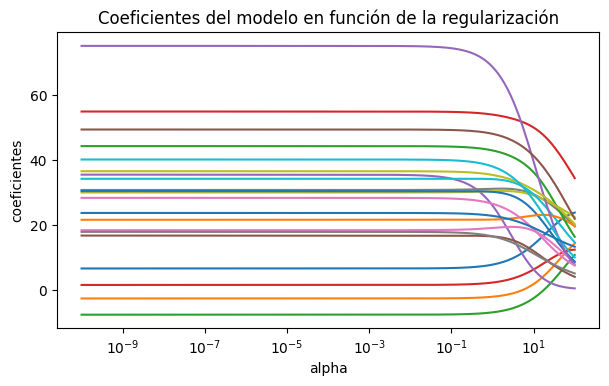

In [34]:
# Evolution of the coefficients as a function of alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

In [35]:
# Evolution of the error as a function of alpha
# ==================================================== ==============================
# model.cv_values stores the mse of cv for each value of alpha. Have
# dimensions (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Apply the square root to go from mse to rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Identifies the optimum and the optimum + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
print(f"Best alpha value found: {modelo.alpha_}")


Best alpha value found: 6.222570836730231


In [37]:
# ==============================================================================
modelo = Ridge(alpha=modelo.alpha_)
modelo.fit(X_train, y_train)

Ridge(alpha=np.float64(6.222570836730231))

In [38]:
# Model test error
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse_ridge = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"The error (rmse) of the test is: {rmse_ridge}")

[[ 96.81786235]
 [106.09082175]
 [124.57507053]]

The error (rmse) of the test is: 29.55325886593589


c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X_train, y_train))

Intercept: [106.79299097]
Coeficiente: [('Python', np.float64(7.155480601896285)), ('excel', np.float64(-2.753731981404615)), ('sql', np.float64(-7.210202619481527)), ('aws', np.float64(1.8722343947212654)), ('Grouped_Rating_2.0', np.float64(2.242018547925199)), ('Grouped_Rating_2.5', np.float64(-7.347449545312474)), ('Grouped_Rating_3.0', np.float64(-7.3158786021975875)), ('Grouped_Rating_3.5', np.float64(2.4089614114224185)), ('Grouped_Rating_4.0', np.float64(2.153624727585466)), ('Grouped_Rating_4.5', np.float64(5.689906254260258)), ('Grouped_Rating_5.0', np.float64(2.168817206316662)), ('group_title_Rest', np.float64(-24.296745710420662)), ('group_title_data engineer', np.float64(-2.3436965039800266)), ('group_title_data scientist', np.float64(8.118804068126678)), ('group_title_machine learning engineer', np.float64(18.521638146273343)), ('group_sector_Biotech & Pharmaceuticals', np.float64(14.921724341388638)), ('group_sector_Business Services', np.float64(-4.193472658146998)), ('

## Lasso

In [40]:
# Creation and training of the model (with search by CV of the optimal alpha value)
# ==================================================== ==============================
# By default LassoCV uses the mean squared error
modelo = LassoCV(
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.062e+02, tolerance: 6.059e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.203e+02, tolerance: 6.059e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

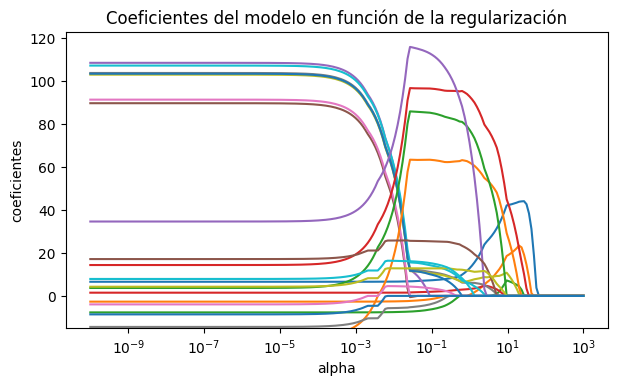

In [41]:
# Evolution of the coefficients as a function of alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.062e+02, tolerance: 6.059e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.203e+02, tolerance: 6.059e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

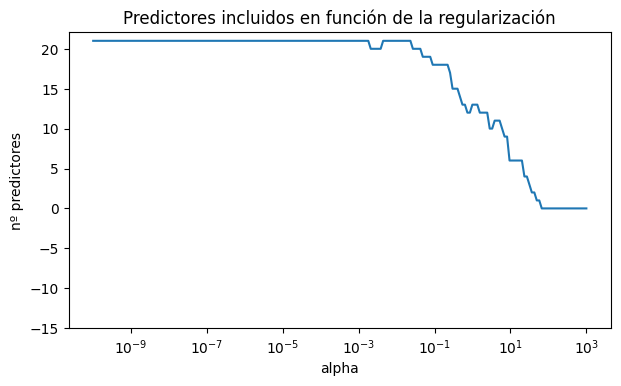

In [42]:
# Number of included predictors (coefficient !=0) as a function of alpha
# ==============================================================================
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

In [43]:
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.10353218432956658


In [44]:

# ==============================================================================
modelo = Lasso(alpha=modelo.alpha_)
modelo.fit(X_train, y_train)

Lasso(alpha=np.float64(0.10353218432956658))

In [45]:
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [113.49659204]
Coeficiente: [('Python', np.float64(6.511322863166503)), ('excel', np.float64(-2.3178460785466584)), ('sql', np.float64(-7.158294185306538)), ('aws', np.float64(1.0433316685010166)), ('Grouped_Rating_2.0', np.float64(0.0)), ('Grouped_Rating_2.5', np.float64(-9.368155466897234)), ('Grouped_Rating_3.0', np.float64(-10.0657655233641)), ('Grouped_Rating_3.5', np.float64(0.0)), ('Grouped_Rating_4.0', np.float64(-0.0)), ('Grouped_Rating_4.5', np.float64(3.1928708574835656)), ('Grouped_Rating_5.0', np.float64(0.0)), ('group_title_Rest', np.float64(-32.724859813257545)), ('group_title_data engineer', np.float64(-9.01342892291087)), ('group_title_data scientist', np.float64(0.6305314000727592)), ('group_title_machine learning engineer', np.float64(16.261861060788387)), ('group_sector_Biotech & Pharmaceuticals', np.float64(19.093018463343096)), ('group_sector_Business Services', np.float64(-0.0)), ('group_sector_Health Care', np.float64(-9.703712916588556)), ('group_sec

In [46]:
# Model test error
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse_lasso = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")

[ 97.54690461 106.14369948 123.83400515]

El error (rmse) de test es: 29.678802145160027


c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
X_test. columns

Index(['Python', 'excel', 'sql', 'aws', 'Grouped_Rating_2.0',
       'Grouped_Rating_2.5', 'Grouped_Rating_3.0', 'Grouped_Rating_3.5',
       'Grouped_Rating_4.0', 'Grouped_Rating_4.5', 'Grouped_Rating_5.0',
       'group_title_Rest', 'group_title_data engineer',
       'group_title_data scientist', 'group_title_machine learning engineer',
       'group_sector_Biotech & Pharmaceuticals',
       'group_sector_Business Services', 'group_sector_Health Care',
       'group_sector_Information Technology', 'group_sector_Insurance',
       'group_sector_Rest'],
      dtype='object')

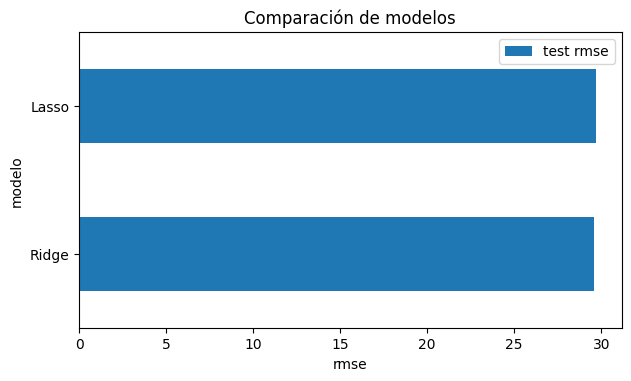

In [48]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Ridge', 'Lasso'],
                    'test rmse': [rmse_ridge, rmse_lasso]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [49]:
jason={
  "question": [   
    "Q1. Python?",
    "Q2. excell?",
    "Q3. sql?",
    "Q4. aws?",
    "Q5. grouped rating?",
    "Q6. group_title?",
    "Q7.group_sector?",      
  ],
  "answer": [
    7,
    5,
    5,
    5,
    5,
    5,
    8,
  ],
  "options": [
       ["yes",
      "no",
      "-",
      "-",
      "-",
      "-",
     "-",
    ],
     ["yes",
      "no",
      "-",
      "-",
      "-",
      "-",
     "-",
    ],
     ["yes",
      "no",
      "-",
      "-",
      "-",
      "-",
     "-",
    ],
     ["yes",
      "no",
      "-",
      "-",
      "-",
      "-",
     "-",
    ],  

    ["hasta 2",
      "desde 2 a 2.5",
      "desde 2.5 a 3",
      "desde 3 a 3.5",
      "desde 3.5 a 4",
      "desde 4 a 4.5",
      "desde 4.5 a 5",
    ],  
    ["rest",
     "data engineer",
      "data scientist",
      "machine learning engineer",
      "-",
      "-",
      "-",
      ],
    [ "Biotech & Pharmaceuticals",
     "Business Services",
     "Health Care",
     "Information Technology",
     "Insurance",
     "rest",
      "-",
     
    ],
      
      
    
  ]
}

In [50]:
# Python program to create a simple GUI
# Simple Quiz using Tkinter
 
#import everything from tkinter
from tkinter import *

# and import messagebox as mb from tkinter
from tkinter import messagebox as mb
Answers=[]
#import json to use json file for data 
#class to define the components of the GUI
class Quiz:
    
    # This is the first method which is called when a
    # new object of the class is initialized. This method
    # sets the question count to 0. and initialize all the
    # other methoods to display the content and make all the
    # functionalities available
    def __init__(self):
         
        # set question number to 0
        self.q_no=0
         
        # assigns ques to the display_question function to update later.
        self.display_title()
        self.display_question()
         
        # opt_selected holds an integer value which is used for
        # selected option in a question.
        self.opt_selected=IntVar()
         
        # displaying radio button for the current question and used to
        # display options for the current question
        self.opts=self.radio_buttons()
         
        # display options for the current question
        self.display_options()
         
        # displays the button for next and exit.
        self.buttons()
         
        # no of questions
        self.data_size=len(question)
         
        # keep a counter of correct answers
        self.correct=0
 
 
    # This method is used to display the result
    # It counts the number of correct and wrong answers
    # and then display them at the end as a message Box
    def display_result(self):
        
    
        
        respuesta=[]
        
        if Answers[0] == 1:
            respuesta.append(1)
        else :
            respuesta.append(0)

        if Answers[1] == 1:
            respuesta.append(1)
        else :
            respuesta.append(0)
    
        if Answers[2] == 1:
            
            respuesta.append(1)
        else :
                    respuesta.append(0)

        if Answers[3] == 1:
            respuesta.append(1)
        else :
            respuesta.append(0)



        if Answers[4]==1:
            respuesta.append(1)
        elif Answers[4] != 1:
            respuesta.append(0)
        if Answers[4] == 2:
            respuesta.append(1)
        elif Answers[4] != 2:
            respuesta.append(0)
        if Answers[4] == 3:
            respuesta.append(1)
        elif Answers[4] != 3:
            respuesta.append(0)
        if Answers[4] == 4:
            respuesta.append(1)
        elif Answers[4] != 4:
            respuesta.append(0)
    
        if Answers[4] == 5:
            respuesta.append(1)
        elif Answers[4] != 5:
            respuesta.append(0)
        if Answers[4] == 6:
            respuesta.append(1)
        elif Answers[4] != 6:
            respuesta.append(0)
        if Answers[4] == 7:
            respuesta.append(1)
        elif Answers[4] != 7:
            respuesta.append(0)

    
    
        if Answers[5]==1:        
            respuesta.append(1)
        elif Answers[5] != 1:
            respuesta.append(0)
        if Answers[5] == 2:
            respuesta.append(1)
        elif Answers[5] != 2:
            respuesta.append(0)
        if Answers[5] == 3:
            respuesta.append(1)
        elif Answers[5] != 3:
            respuesta.append(0)
        if Answers[5] == 4:
            respuesta.append(1)
        elif Answers[5] != 4:
            respuesta.append(0)
    
    
    
    
    
        if Answers[6]==1:
            respuesta.append(1)
    
        elif Answers[6] != 1:
            respuesta.append(0)

        if Answers[6] == 2:
            respuesta.append(1)
    
        elif Answers[6] != 2:
            respuesta.append(0)
    
        if Answers[6] == 3:
            respuesta.append(1)
        elif Answers[6] != 3:
            respuesta.append(0)
        if Answers[6] == 4:
            respuesta.append(1)
        elif Answers[6] != 4:
            respuesta.append(0)
    
        if Answers[6] == 5:
            respuesta.append(1)
        elif Answers[6] != 5:
            respuesta.append(0)   
    
        if Answers[6] == 6:
            respuesta.append(1)
        elif Answers[6] != 6:
            respuesta.append(0)
        respuesta=np. array(respuesta) 
        respuesta=respuesta.reshape(1, -1)
        predicciones = modelo.predict(respuesta)
        salary=f"Salary: {predicciones}"
    


        
        
         
        # Shows a message box to display the result
        mb.showinfo("Result", f"\n{salary}")
 
 
    # This method checks the Answer after we click on Next.
    def check_ans(self, q_no):
        Answers.append(self.opt_selected.get())
        # checks for if the selected option is correct
        if self.opt_selected.get() == answer[q_no]:
            # if the option is correct it return true
            return True
 
    # This method is used to check the answer of the
    # current question by calling the check_ans and question no.
    # if the question is correct it increases the count by 1
    # and then increase the question number by 1. If it is last
    # question then it calls display result to show the message box.
    # otherwise shows next question.
    def next_btn(self):
         
        # Check if the answer is correct
        if self.check_ans(self.q_no):
             
            # if the answer is correct it increments the correct by 1
            self.correct += 1
         
        # Moves to next Question by incrementing the q_no counter
        self.q_no += 1
         
        # checks if the q_no size is equal to the data size
        if self.q_no==self.data_size:
             
            # if it is correct then it displays the score
            self.display_result()
             
            # destroys the GUI
            gui.destroy()
        else:
            # shows the next question
            self.display_question()
            self.display_options()
 
 
    # This method shows the two buttons on the screen.
    # The first one is the next_button which moves to next question
    # It has properties like what text it shows the functionality,
    # size, color, and property of text displayed on button. Then it
    # mentions where to place the button on the screen. The second
    # button is the exit button which is used to close the GUI without
    # completing the quiz.
    def buttons(self):
         
        # The first button is the Next button to move to the
        # next Question
        next_button = Button(gui, text="Next",command=self.next_btn,
        width=10,bg="blue",fg="white",font=("ariel",16,"bold"))
         
        # palcing the button  on the screen
        next_button.place(x=350,y=380)
         
        # This is the second button which is used to Quit the GUI
        quit_button = Button(gui, text="Quit", command=gui.destroy,
        width=5,bg="black", fg="white",font=("ariel",16," bold"))
         
        # placing the Quit button on the screen
        quit_button.place(x=700,y=50)
 
 
    # This method deselect the radio button on the screen
    # Then it is used to display the options available for the current
    # question which we obtain through the question number and Updates
    # each of the options for the current question of the radio button.
    def display_options(self):
        val=0
         
        # deselecting the options
        self.opt_selected.set(0)
         
        # looping over the options to be displayed for the
        # text of the radio buttons.
        for option in options[self.q_no]:
            self.opts[val]['text']=option
            val+=1
 
 
    # This method shows the current Question on the screen
    def display_question(self):
         
        # setting the Question properties
        q_no = Label(gui, text=question[self.q_no], width=60,
        font=( 'ariel' ,16, 'bold' ), anchor= 'w' )
         
        #placing the option on the screen
        q_no.place(x=70, y=100)
 
 
    # This method is used to Display Title
    def display_title(self):
         
        # The title to be shown
        title = Label(gui, text="Salary prediction",
        width=50, bg="green",fg="white", font=("ariel", 20, "bold"))
         
        # place of the title
        title.place(x=0, y=2)
 
 
    # This method shows the radio buttons to select the Question
    # on the screen at the specified position. It also returns a
    # lsit of radio button which are later used to add the options to
    # them.
    def radio_buttons(self):
         
        # initialize the list with an empty list of options
        q_list = []
         
        # position of the first option
        y_pos = 150
         
        # adding the options to the list
        while len(q_list) < 7:
             
            # setting the radio button properties
            radio_btn = Radiobutton(gui,text=" ",variable=self.opt_selected,
            value = len(q_list)+1,font = ("ariel",14))
             
            # adding the button to the list
            q_list.append(radio_btn)
             
            # placing the button
            radio_btn.place(x = 100, y = y_pos)
             
            # incrementing the y-axis position by 40
            y_pos += 40
         
        # return the radio buttons
        return q_list
 
# Create a GUI Window
gui = Tk()
 
# set the size of the GUI Window
gui.geometry("800x450")
 
# set the title of the Window
gui.title("Salary prediction")
 
# get the data from the json file
data = jason
 
# set the question, options, and answer
question = (data['question'])
options = (data['options'])
answer = (data[ 'answer'])
 
# create an object of the Quiz Class.
quiz = Quiz()
 
# Start the GUI
gui.mainloop()
 
# END OF THE PROGRAM

c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [51]:
import joblib

modelo
# Export the model as a file
joblib.dump(modelo, 'ridge_model.pkl')

['ridge_model.pkl']

In [52]:
predicciones = modelo.predict(respuesta)

NameError: name 'respuesta' is not defined

In [52]:
modelo

Lasso(alpha=np.float64(0.10353218432956658))

In [64]:
X_test.columns

Index(['Python', 'excel', 'sql', 'aws', 'Grouped_Rating_2.0',
       'Grouped_Rating_2.5', 'Grouped_Rating_3.0', 'Grouped_Rating_3.5',
       'Grouped_Rating_4.0', 'Grouped_Rating_4.5', 'Grouped_Rating_5.0',
       'group_title_Rest', 'group_title_data engineer',
       'group_title_data scientist', 'group_title_machine learning engineer',
       'group_sector_Biotech & Pharmaceuticals',
       'group_sector_Business Services', 'group_sector_Health Care',
       'group_sector_Information Technology', 'group_sector_Insurance',
       'group_sector_Rest'],
      dtype='object')

In [62]:
questions = [
       "Q1. Do you have experience with Python?",
       "Q2. Do you have experience with Excel?",
       "Q3. Do you have experience with SQL?",
       "Q4. Do you have experience with AWS?",
       "Q5. What is your grouped rating?",
       "Q6. What is your job title?",
       "Q7. What is your sector?"
]

options = [
       ["Yes", "No"],
       ["Yes", "No"],
       ["Yes", "No"],
       ["Yes", "No"],
       ["Up to 2", "2 to 2.5", "2.5 to 3", "3 to 3.5", "3.5 to 4", "4 to 4.5", "4.5 to 5"],
       ["Rest", "Data Engineer", "Data Scientist", "Machine Learning Engineer"],
       ["Biotech & Pharmaceuticals", "Business Services", "Health Care", "Information Technology", "Insurance", "Rest"]
]

answers = [1, 1, 1, 1, 5, 3, 4]

# Create a dictionary to store the questions, options, and answers
quiz_data = {
       "questions": questions,
       "options": options,
       "answers": answers
}

# Print the quiz data to verify
print(quiz_data)

{'questions': ['Q1. Do you have experience with Python?', 'Q2. Do you have experience with Excel?', 'Q3. Do you have experience with SQL?', 'Q4. Do you have experience with AWS?', 'Q5. What is your grouped rating?', 'Q6. What is your job title?', 'Q7. What is your sector?'], 'options': [['Yes', 'No'], ['Yes', 'No'], ['Yes', 'No'], ['Yes', 'No'], ['Up to 2', '2 to 2.5', '2.5 to 3', '3 to 3.5', '3.5 to 4', '4 to 4.5', '4.5 to 5'], ['Rest', 'Data Engineer', 'Data Scientist', 'Machine Learning Engineer'], ['Biotech & Pharmaceuticals', 'Business Services', 'Health Care', 'Information Technology', 'Insurance', 'Rest']], 'answers': [1, 1, 1, 1, 5, 3, 4]}


In [65]:
# Define the answers
answers = [1, 1, 1, 1, 5, 3, 4]

# Initialize the input variables with zeros
input_variables = np.zeros(21)

# Map the answers to the corresponding variables
input_variables[0] = answers[0]  # Python
input_variables[1] = answers[1]  # excel
input_variables[2] = answers[2]  # sql
input_variables[3] = answers[3]  # aws

# Grouped_Rating
input_variables[4 + (answers[4] - 2)] = 1  # Grouped_Rating_2.0 to Grouped_Rating_5.0

# group_title
if answers[5] == 1:
    input_variables[11] = 1  # group_title_Rest
elif answers[5] == 2:
    input_variables[12] = 1  # group_title_data engineer
elif answers[5] == 3:
    input_variables[13] = 1  # group_title_data scientist
elif answers[5] == 4:
    input_variables[14] = 1  # group_title_machine learning engineer

# group_sector
if answers[6] == 1:
    input_variables[15] = 1  # group_sector_Biotech & Pharmaceuticals
elif answers[6] == 2:
    input_variables[16] = 1  # group_sector_Business Services
elif answers[6] == 3:
    input_variables[17] = 1  # group_sector_Health Care
elif answers[6] == 4:
    input_variables[18] = 1  # group_sector_Information Technology
elif answers[6] == 5:
    input_variables[19] = 1  # group_sector_Insurance
elif answers[6] == 6:
    input_variables[20] = 1  # group_sector_Rest

# Convert to the appropriate format for the model
respuesta = input_variables.reshape(1, -1)

# Predict the salary using the model
predicciones = modelo.predict(respuesta)

# Print the predicted salary
print(f"Predicted Salary: {predicciones[0]}")

Predicted Salary: 119.3666198807767


c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [55]:
num_columns = X_test.shape[1]
print(f"Number of columns in X_test: {num_columns}")

Number of columns in X_test: 21


In [63]:
answers = [1, 1, 1, 1, 5, 3, 4]
# Convert answers to the appropriate format for the model
respuesta = np.array(answers).reshape(1, -1)

# Predict the salary using the model
predicciones = modelo.predict(respuesta)

# Print the predicted salary
print(f"Predicted Salary: {predicciones[0]}")

c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


ValueError: X has 7 features, but Lasso is expecting 21 features as input.

In [60]:
model

LinearRegression()

In [56]:
X_test.columns

Index(['Python', 'excel', 'sql', 'aws', 'Grouped_Rating_2.0',
       'Grouped_Rating_2.5', 'Grouped_Rating_3.0', 'Grouped_Rating_3.5',
       'Grouped_Rating_4.0', 'Grouped_Rating_4.5', 'Grouped_Rating_5.0',
       'group_title_Rest', 'group_title_data engineer',
       'group_title_data scientist', 'group_title_machine learning engineer',
       'group_sector_Biotech & Pharmaceuticals',
       'group_sector_Business Services', 'group_sector_Health Care',
       'group_sector_Information Technology', 'group_sector_Insurance',
       'group_sector_Rest'],
      dtype='object')

In [ ]:
input_variables = ['Python', 'excel', 'sql', 'aws', 'Grouped_Rating_2.0',input_variables

In [ ]:
with open('modelo_001_salary_pred.pkl', 'rb') as model_file:
    model = pickle.load(model_file)


NameError: name 'pickle' is not defined

In [74]:
# Define las respuestas
answers = [1, 1, 1, 1, 5, 3, 4]

# Inicializa las variables de entrada con ceros
input_variables = np.zeros(21)

# Mapea las respuestas a las variables correspondientes
input_variables[0] = answers[0]  # Python
input_variables[1] = answers[1]  # excel
input_variables[2] = answers[2]  # sql
input_variables[3] = answers[3]  # aws

# Grouped_Rating
input_variables[4 + (answers[4] - 2)] = 1  # Grouped_Rating_2.0 to Grouped_Rating_5.0

# group_title
if answers[5] == 1:
    input_variables[11] = 1  # group_title_Rest
elif answers[5] == 2:
    input_variables[12] = 1  # group_title_data engineer
elif answers[5] == 3:
    input_variables[13] = 1  # group_title_data scientist
elif answers[5] == 4:
    input_variables[14] = 1  # group_title_machine learning engineer

# group_sector
if answers[6] == 1:
    input_variables[15] = 1  # group_sector_Biotech & Pharmaceuticals
elif answers[6] == 2:
    input_variables[16] = 1  # group_sector_Business Services
elif answers[6] == 3:
    input_variables[17] = 1  # group_sector_Health Care
elif answers[6] == 4:
    input_variables[18] = 1  # group_sector_Information Technology
elif answers[6] == 5:
    input_variables[19] = 1  # group_sector_Insurance
elif answers[6] == 6:
    input_variables[20] = 1  # group_sector_Rest

# Convierte a formato adecuado para el modelo
respuesta = input_variables.reshape(1, -1)

# Carga el modelo entrenado
import joblib
model_2 = joblib.load('modelo_001_salary_pred.pkl')

# Predice el salario usando el modelo cargado
predicciones = model_2.predict(respuesta)

# Imprime el salario predicho
print(f"Predicted Salary: {predicciones[0]}")

Predicted Salary: 119.3666198807767


c:\Users\crist\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [72]:
model_2

array(['Python', 'excel', 'sql', 'aws', 'Grouped_Rating_2.0',
       'Grouped_Rating_2.5', 'Grouped_Rating_3.0', 'Grouped_Rating_3.5',
       'Grouped_Rating_4.0', 'Grouped_Rating_4.5', 'Grouped_Rating_5.0',
       'group_title_Rest', 'group_title_data engineer',
       'group_title_data scientist',
       'group_title_machine learning engineer',
       'group_sector_Biotech & Pharmaceuticals',
       'group_sector_Business Services', 'group_sector_Health Care',
       'group_sector_Information Technology', 'group_sector_Insurance',
       'group_sector_Rest'], dtype=object)